## Unsupervised learning miniproject-Kohonen networks

Good reference to understand following code and Kohonen networks in general is chapter 9 of 'Neural networks-A comprehensive foundation' book by Simon Haykin

In [126]:
def gaussian(d,sigma):
    #Used to calculate topoligical neighborhood function of winner neuron
    #d is the distance (between winning and other particular neuron)
    #sigma_n=sigma_0*np.exp(-(iteration/tau1))
    return np.exp((-((d)**2))/(2 *sigma**2))

In [153]:
#def update_learning(weight,eta,h,in_features):
    # h stands for gaussian
#    l=len(weight)
#    out=[]
#    for i in range(0,l):
#        out.append(weight[i]+eta*h*(in_features[i]-weight[i]))
#    return out#weight+eta*h*(in_features-weight)

In [291]:
def update_learning(weight,eta,h,in_features):
    out=[weight[i]+eta*h*(in_features[i]-weight[i]) for i in range(0,len(weight))]
    return out

In [136]:
import operator
import numpy as np
def name2digits(name):
    """ takes a string NAME and converts it into a pseudo-random selection of 4
     digits from 0-9.     
     """
    name = name.lower()
    if len(name)>25:
        name = name[0:25]
    primenumbers = [2,3,5,7,11,13,17,19,23,29,31,37,41,43,47,53,59,61,67,71,73,79,83,89,97]
    n = len(name)
    s = 0.0
    for i in range(n):
        s += primenumbers[i]*ord(name[i])*2.0**(i+1)
    import scipy.io.matlab
    Data = scipy.io.matlab.loadmat('miniproject1_data/hash.mat',struct_as_record=True)
    x = Data['x']
    t = np.mod(s,x.shape[0])
    return np.sort(x[t,:])

In [312]:
size_neuron=6
eta0=0.1#recommended start
eta=eta0#initialize eta
sigma0=3#recomended start
sigma=sigma0#initialize sigma
tau1=1000/(np.log(sigma0))
tau2=1000
weights=np.random.random((size_neuron**2,28*28))#random initialization of weights
Data = np.genfromtxt('miniproject1_data/data.txt')
Labels = np.genfromtxt('miniproject1_data/labels.txt')
araz=name2digits('Araz Yaqubov')
chosen_digits=[digits[i] for i in range(0,len(Labels)) if(Labels[i] in araz)]#only 4 digits are chosen
l=len(chosen_digits)
import time
# Learning
for i in range(0,20):
    start=time.time()
    for d in range(0,l):# run through all elements in chosen_digits data
        data=np.array(chosen_digits[d])
        shaped_data=np.reshape(data,(784,))
        dif=[]
        dif=[np.sum(np.square(np.subtract(shaped_data,weights[w]))) for w in range(0,size_neuron**2)]
        max_index, max_value = max(enumerate(dif), key=operator.itemgetter(1))
        #now find topological neighborhood function of winner neuron
        dist=[]
        h=[]#topological neighborhood function
        dist=[(dif[max_index]-dif[w]) for w in range(0,size_neuron**2)]
        h=[gaussian(dist[w],sigma) for w in range(0,size_neuron**2)]
        weights=[update_learning(weights[w],eta,h[w],shaped_data) for w in range(0,size_neuron**2)]
        #
    sigma=sigma0*np.exp(-i/tau1)
    eta=eta0*np.exp(-i/tau2)
    end=time.time()
print(end-start)  

/Users/user/Desktop/epfl_semester5/data_analyis/anaconda_folder/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


30.90540099143982


In [ ]:
#visualize the results
plt.figure(1)
for i in range(0,size_neuron**2):
    plt.axis('off')
    plt.subplot(size_neuron,size_neuron,i+1)
    plt.imshow(np.reshape(weights[i],(28,28)))

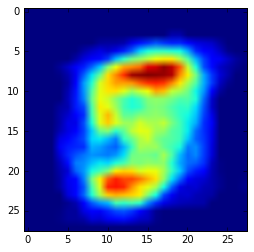

In [310]:
plt.imshow(np.reshape(weights[20],(28,28)))

In [304]:
np.sum([3,4,5,7])

19

In [262]:
a=[1,2,3]*10000
b=[1,1,1]*10000
start=time.time()
from operator import add;
#map(sub, a, b)
d=np.sum(np.square(np.subtract(data,ww)))
#d=map()
#np.subtract(a,b)
end=time.time()
print(end-start)

0.0001690387725830078


In [229]:
k=np.reshape(weights[1],(28,28))

In [204]:
np.subtract(data,ww)


array([[ -4.06787575e-21,  -2.18940072e-21,  -2.12623812e-20,
         -8.14550066e-21,  -6.17423463e-21,  -2.02986434e-20,
         -2.64958867e-20,  -7.35009932e-21,  -1.61936688e-20,
         -2.71560724e-20,  -2.85477457e-20,  -2.41575223e-20,
         -2.62380809e-20,  -1.34873117e-20,  -1.14387339e-20,
         -2.90730425e-20,  -7.30742050e-22,  -3.03834544e-20,
         -4.99411301e-21,  -2.16010239e-21,  -7.44806715e-21,
         -2.40487644e-20,  -1.84473623e-20,  -1.64498563e-21,
         -1.14359892e-21,  -1.41132356e-20,  -2.72637893e-20,
         -3.39588559e-20],
       [ -2.29884859e-20,  -3.01105936e-20,  -1.63820658e-20,
         -2.44410285e-21,  -5.11079075e-21,  -1.70290575e-20,
         -2.29667984e-21,  -3.01640695e-20,  -3.49160075e-20,
         -3.64679633e-21,  -1.95457762e-20,  -2.16436925e-20,
         -1.51943096e-20,  -1.29989940e-20,  -1.00439465e-03,
         -2.51098664e-03,  -3.24951212e-04,  -2.28274059e-20,
         -7.31757171e-22,  -2.77296466e-20,

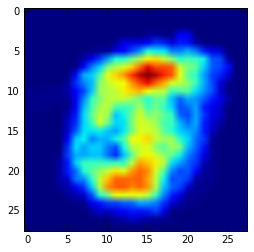

In [199]:
plt.imshow(k)

In [19]:
Data = np.genfromtxt('miniproject1_data/data.txt')
Data.shape

(5000, 784)

In [24]:
Labels = np.genfromtxt('miniproject1_data/labels.txt')
Labels.shape

(5000,)

In [38]:
# visualization:
digits=np.reshape(Data,[5000,28,28])

In [59]:
len(Labels)

5000

In [77]:
chosen_digits=[digits[i] for i in range(0,len(Labels)) if(Labels[i] in araz)]
len(chosen_digits)

2000

In [47]:

%matplotlib inline
import matplotlib.pyplot as plt
#plt.show(digits[0])

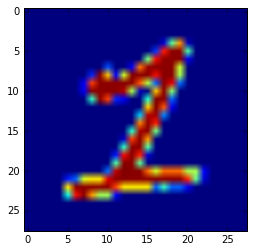

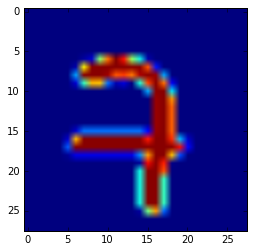

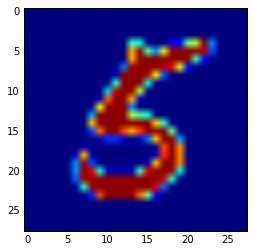

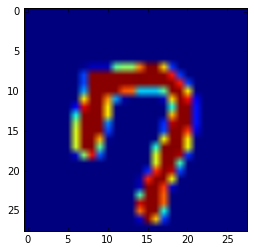

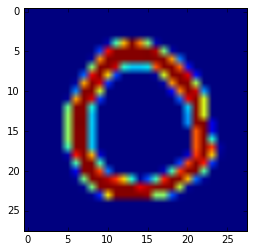

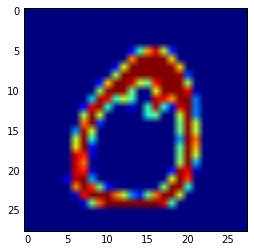

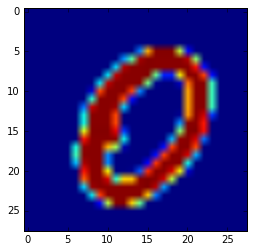

In [82]:
#plt.imshow(digits[0],interpolation='nearest')

for i in range(9):
    plt.subplot(33)
    plt.imshow(chosen_digits[i])
    plt.figure(i+1)
plt.show()

In [6]:
import numpy as np
import operator
#Kohonen nets
# inp_features will be equal to one data point such as chosen_digits[0]
def koh_nets(inp_features,weights,sigma,num_iter,):
    l=len(inp_features)
    w=len(weights)    
    for i in range(0,w):
        if(len(weights[i])!=l):
            print('Input feature size must be equal to the size of weights');    

    # COMPETITION part
    dif=[]
    for it in range(0,num_iter):
        for i in range(0,w):
            d=inp_features-weights(i)
            dif.append(d)
        # find the maximum value and corresponding index which is for finding the winner neuron
        max_index, max_value = max(enumerate(def), key=operator.itemgetter(1))
        # max_index corresponds to winning 

        #iteration number

        # COOPERATION and ADAPTATION part
        #topological neighborhood
        y=weight*np.transpose(x)
        w(iteration)=update_learning(weight,)

SyntaxError: invalid syntax (<ipython-input-6-53df44801c11>, line 17)

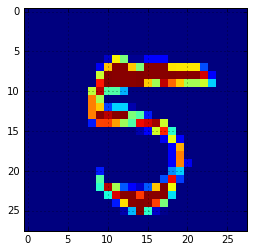

In [48]:
from pylab import *
figure(1)
imshow(digits[0], interpolation='nearest')
grid(True)

In [34]:
ww=[2,3,4,5,6]
hh=[2,2,2,2,2]
ww*np.transpose(hh)

array([ 4,  6,  8, 10, 12])

In [32]:
np.transpose(ww)

array([2, 3, 4, 5, 6])

In [49]:
Labels[0]

5.0